In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Outline of training

1. Train Deterministic Model (CDNA) for 200 epochs (constant LR = 1e-4) 
2. Train Unregulated Stochastic Model for 100 epochs (constant LR = 1e-4)
3. Train Regulated Stochastic Model for 100 epochs (constant LR = 1e-4)


In [2]:
loss_path_1 = '../../logs/cdna/stage1/cdna_stage=1_200.log'
loss_path_2 = '../../logs/cdna/stage2/cdna_stage=2_100.log'

loss_path_3_dot1 = '../../logs/cdna/stage3/finalB=0.1/cdna_stage=3_100.log'
loss_path_3_dot0001 = '../../logs/cdna/stage3/finalB=0.0001/cdna_stage=3_100.log'

### Step 1



In [5]:
def plot_losses_stage1(log_path):
    """
    Log files for other models may be formatted differently
    """

    losses = []

    with open(log_path) as f:
        # ignore first line
        for idx, line in enumerate(f):
            if "Namespace" in line or "Starting" in line or "Train" in line or "State" in line: 
                pass
            elif "Finished" in line or "Saved" in line or "Completed" in line: 
                pass
            else:
                x = line.split(":")[-1]
                x = x.strip("\n")
                losses.append(x)

    train_loss = []
    
    for line in losses:
        line = line.split(",")
        train_loss.append(float(line[0]))

    return train_loss

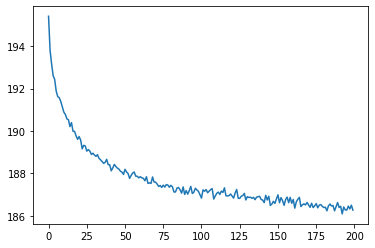

In [7]:
train_loss1 = plot_losses_stage1(log_path=loss_path_1)
plt.plot(train_loss1)

### Step 2

In [8]:
def plot_losses_stage2(log_path):
    """
    Log files for other models may be formatted differently
    """

    losses = []

    with open(log_path) as f:
        # ignore first line
        for idx, line in enumerate(f):
            if "Namespace" in line or "Starting" in line or "Train" in line or "State" in line: 
                pass
            elif "Finished" in line or "Saved" in line or "Completed" in line: 
                pass
            else:
                x = line.split(":")[-1]
                x = x.strip("\n")
                losses.append(x)

    train_loss = []
    kld = []
    reconstruction_loss = []

    for line in losses:
        line = line.split(",")
        train_loss.append(float(line[0]))
        kld.append(float(line[1]))
        reconstruction_loss.append(float(line[2]))

    return train_loss, kld, reconstruction_loss

In [16]:
train_loss2, kld2, mse2 = plot_losses_stage2(loss_path_2)
print(len(train_loss2), len(kld2), len(mse2))

100 100 100


### Step 3

In [26]:
train_loss3_dot1, kld3_dot1, mse3_dot1 = plot_losses_stage2(loss_path_3_dot1)
print(len(train_loss3_dot1), len(kld3_dot1), len(mse3_dot1))

# plt.plot(kld3_dot1)

100 100 100


In [27]:
train_loss3_dot0001, kld3_dot0001, mse3_dot0001 = plot_losses_stage2(loss_path_3_dot0001)

### Combine all lists together

In [43]:
train_loss_dot1 = train_loss1 + train_loss2 + train_loss3_dot1
kld1 = [0] * 200
kld_dot1 = kld1 + kld2 + kld3_dot1
mse_dot1 = train_loss1 + mse2 + mse3_dot1
# mse = mse1 + mse2 + mse3 + mse4 + mse5

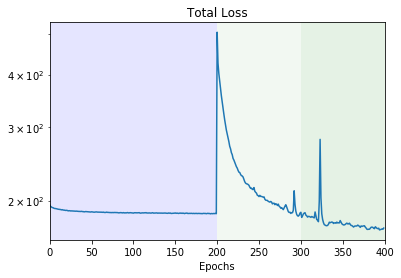

In [30]:
plt.plot(train_loss_dot1)
plt.yscale('log')
plt.xlabel('Epochs')
plt.title('Total Loss')

# Settings 
plt.xlim(xmin=0, xmax = 400)
plt.axvspan(0, 200, facecolor='b', alpha=0.1)
plt.axvspan(200, 300, facecolor='g', alpha=0.05)
plt.axvspan(300, 400, facecolor='g', alpha=0.1)

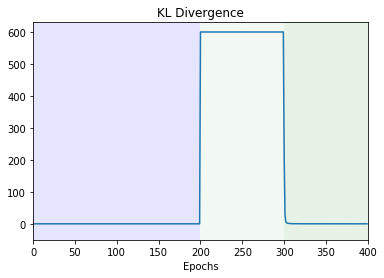

In [41]:
plt.plot(kld_dot1)
# plt.yscale('log')
plt.xlabel('Epochs')
plt.title('KL Divergence')

# Settings 
plt.xlim(xmin=0, xmax = 400)
plt.ylim(ymin=-50)
plt.axvspan(0, 200, facecolor='b', alpha=0.1)
plt.axvspan(200, 300, facecolor='g', alpha=0.05)
plt.axvspan(300, 400, facecolor='g', alpha=0.1)

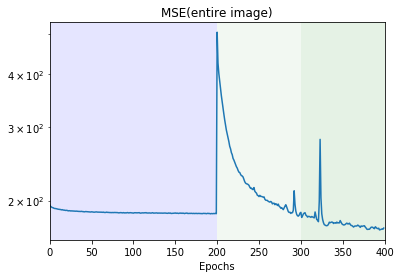

In [47]:
plt.plot(mse_dot1)
plt.yscale('log')
plt.xlabel('Epochs')
plt.title('MSE(entire image)')

# Settings 
plt.xlim(xmin=0, xmax = 400)
plt.axvspan(0, 200, facecolor='b', alpha=0.1)
plt.axvspan(200, 300, facecolor='g', alpha=0.05)
plt.axvspan(300, 400, facecolor='g', alpha=0.1)